## Pizza Place Sales
https://www.mavenanalytics.io/data-playground?search=sales

A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

Recommended Analysis

- How many customers do we have each day? Are there any peak hours?

- How many pizzas are typically in an order? Do we have any bestsellers?

- How much money did we make this year? Can we indentify any seasonality in the sales?

- Are there any pizzas we should take of the menu, or any promotions we could leverage?



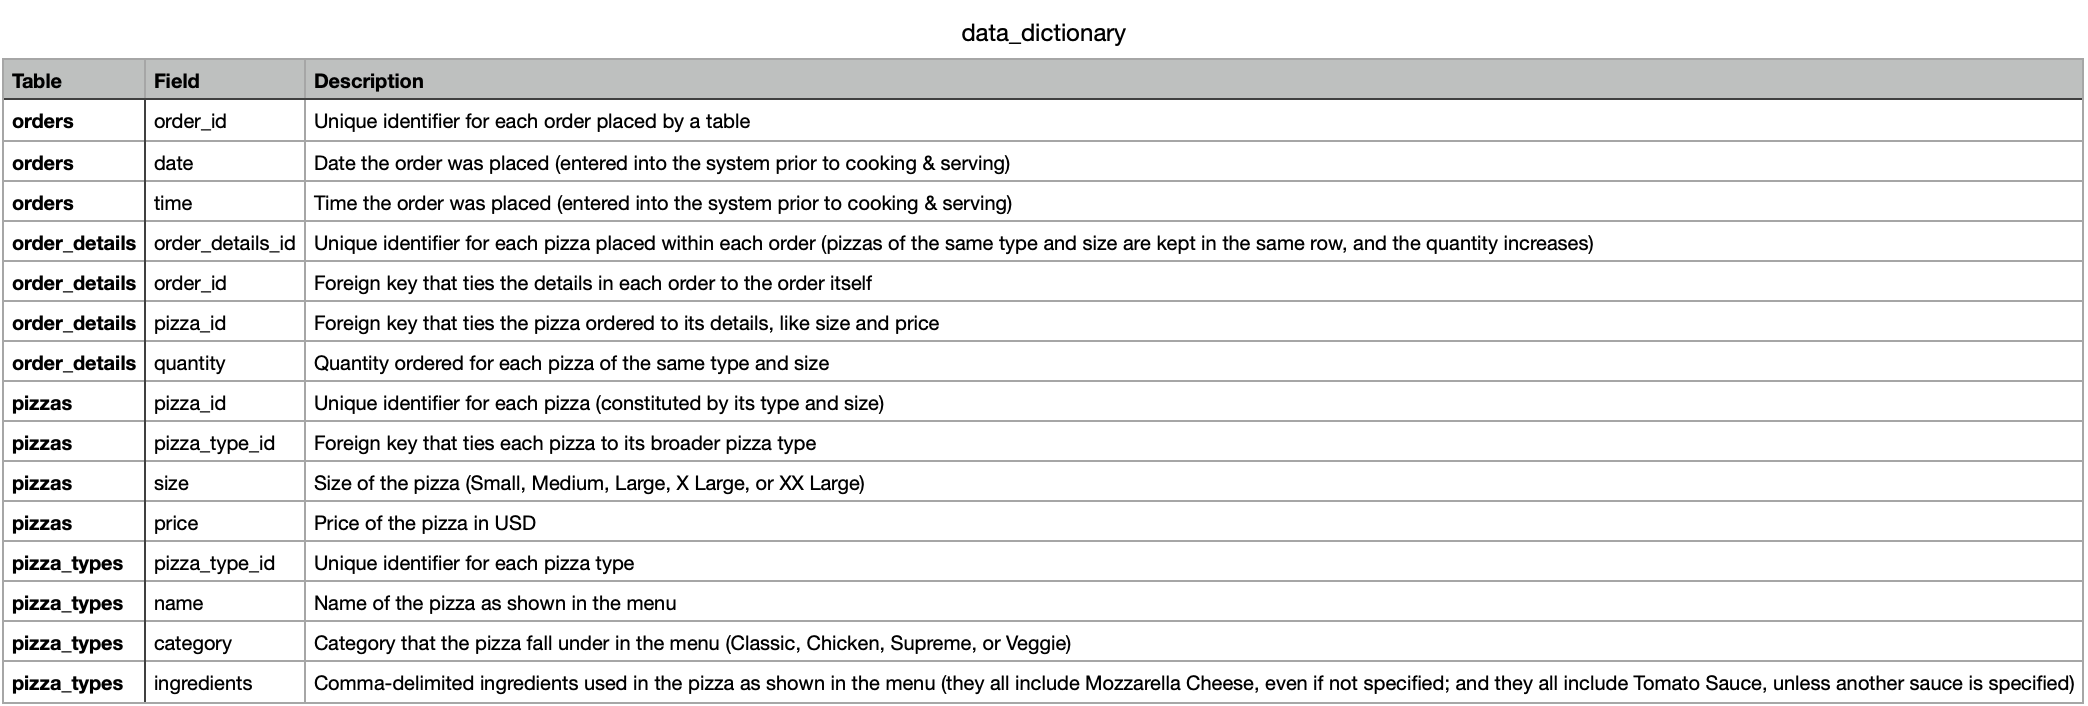

Bilbiotecas

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [283]:
pizzatypes = pd.read_csv('pizza_types.csv')
pizza = pd.read_csv('pizzas.csv')
orders = pd.read_csv('orders.csv', parse_dates=['date'])
orders_details = pd.read_csv('order_details.csv')

### Orders

In [284]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


O conjunto de dados contem informa

In [285]:
### FORMATANDO VARIACOES DE DATA E HORA

from datetime import datetime
from datetime import date
import locale

locale.setlocale(locale.LC_ALL,'')
print(locale.setlocale(locale.LC_ALL,''))

MESES = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

orders['month_num'] = orders.date.dt.month # MES
orders['month_name'] = [MESES[x] for x in orders.date.dt.month-1] # -1 para contar o mes apartir de zero e nao de 1 ... pra ficar no mesmo indice da lista MES
orders['num_of_day'] = [x.weekday()+1 for x in orders.date] 
orders['day_of_week'] = orders['date'].apply(lambda x: x.strftime('%a')if pd.notna(x) else '')
# orders['month_day'] = orders['date'].apply(lambda x: x.dt.month.strftime('%a'))
orders['hour'] = [ h.split(':')[0] for h in orders.time]
orders.head()

pt_BR.UTF-8


,order_id,date,time,month_num,month_name,num_of_day,day_of_week,hour
0,1,2015-01-01,11:38:36,1,Jan,4,Qui,11
1,2,2015-01-01,11:57:40,1,Jan,4,Qui,11
2,3,2015-01-01,12:12:28,1,Jan,4,Qui,12
3,4,2015-01-01,12:16:31,1,Jan,4,Qui,12
4,5,2015-01-01,12:21:30,1,Jan,4,Qui,12


In [309]:
selectCols = ['month_name','day_of_week','hour']
orders.loc[:,selectCols]

,month_name,day_of_week,hour
0,Jan,Qui,11
1,Jan,Qui,11
2,Jan,Qui,12
3,Jan,Qui,12
4,Jan,Qui,12
...,...,...,...
21345,Dez,Qui,20
21346,Dez,Qui,21
21347,Dez,Qui,21
21348,Dez,Qui,22


In [311]:
[print('{}\n{}'.format(column,orders[column].value_counts().to_string()), "\n","-"*20) for column in orders.loc[:,selectCols]]

month_name
Jul    1935
Mai    1853
Jan    1845
Ago    1841
Mar    1840
Abr    1799
Nov    1792
Jun    1773
Fev    1685
Dez    1680
Set    1661
Out    1646 
 --------------------
day_of_week
Sex    3538
Qui    3239
Sáb    3158
Qua    3024
Ter    2973
Seg    2794
Dom    2624 
 --------------------
hour
12    2520
13    2455
18    2399
17    2336
19    2009
16    1920
20    1642
14    1472
15    1468
11    1231
21    1198
22     663
23      28
10       8
09       1 
 --------------------


[None, None, None]

In [286]:
orderXmonth =  orders.groupby(['month_num','month_name']).size().reset_index(level=0,drop=True)
orderXmonth

month_name
Jan    1845
Fev    1685
Mar    1840
Abr    1799
Mai    1853
Jun    1773
Jul    1935
Ago    1841
Set    1661
Out    1646
Nov    1792
Dez    1680
dtype: int64

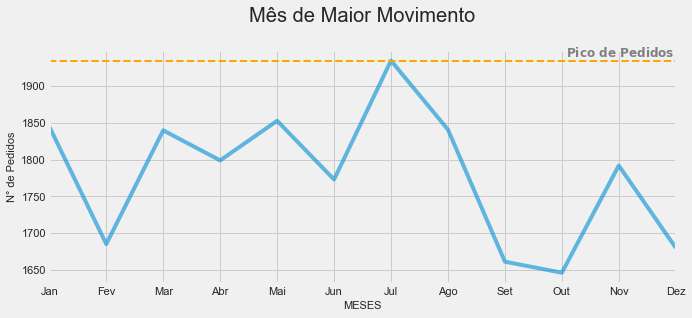

In [251]:
### GRÁFICO 1 - MES DE MAIOR MOVIMENTO NA PIZZARIA
fig, ax = plt.subplots( figsize=(10,4))
orderXmonth.plot(kind='line',ax=ax, alpha=0.6)

ax.set_xlabel("MESES", fontsize= 11)
ax.set_ylabel("N° de Pedidos", fontsize= 11)

plt.title('Mês de Maior Movimento\n')
plt.xticks(np.arange(len(MESES)), MESES, rotation='360')
ax.tick_params(axis = 'both', which = 'major', labelsize = 11)
# plt.legend(loc='upper left', borderaxespad=0,bbox_to_anchor=(0.05, 0.98), fontsize=11)
plt.xlim(0,11)
plt.text(9, 1940,'$\\bf{\ Pico\ de\ Pedidos}$',fontsize=12, color='gray',)# bbox={'edgecolor':'None','facecolor':'black', 'boxstyle':'round'} )
plt.axhline(y = 1935, color = 'orange', linestyle = 'dashed',linewidth=2)  
# plt.grid(axis='y')
plt.show()


In [287]:
orderXday =  orders.groupby(['num_of_day','day_of_week']).size().reset_index(level=0,drop=True)
orderXday

day_of_week
Seg    2794
Ter    2973
Qua    3024
Qui    3239
Sex    3538
Sáb    3158
Dom    2624
dtype: int64

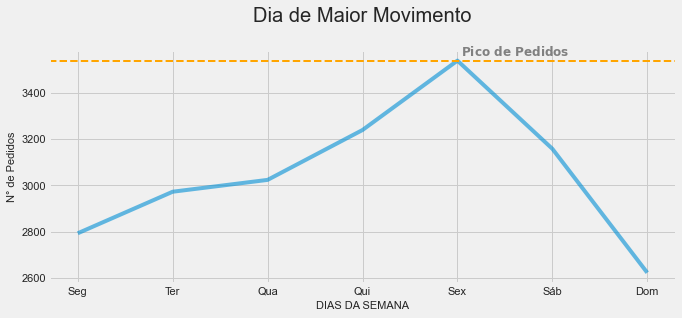

In [288]:
### GRÁFICO 3 - HORA DE MAIOR MOVIMENTO NA PIZZARIA

DiasSemana = list(orderXday.index)
fig, ax = plt.subplots( figsize=(10,4))
orderXday.plot(kind='line',ax=ax, alpha=0.6)

ax.set_xlabel("DIAS DA SEMANA", fontsize= 11)
ax.set_ylabel("N° de Pedidos", fontsize= 11)

plt.title('Dia de Maior Movimento\n')
plt.xticks(np.arange(len(DiasSemana)), DiasSemana, rotation='360')
ax.tick_params(axis = 'both', which = 'major', labelsize = 11)
# plt.legend(loc='upper left', borderaxespad=0,bbox_to_anchor=(0.05, 0.98), fontsize=11)
# plt.xlim(0,4)
plt.text(4, 3558,'$\\bf{\ Pico\ de\ Pedidos}$',fontsize=12, color='gray',)# bbox={'edgecolor':'None','facecolor':'black', 'boxstyle':'round'} )
plt.axhline(y = 3538, color = 'orange', linestyle = 'dashed',linewidth=2)  
# plt.grid(axis='y')
plt.show()

In [289]:
orderXhora =  orders.groupby('hour').size()#.reset_index(level=0,drop=True)
orderXhora

hour
09       1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
dtype: int64

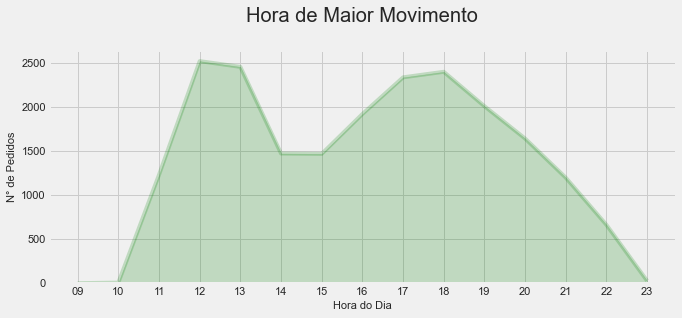

In [290]:
### GRÁFICO 2 - DIA DE MAIOR MOVIMENTO NA PIZZARIA

Hora = list(orderXhora.index)
fig, ax = plt.subplots( figsize=(10,4))
orderXhora.plot(kind='area',ax=ax, alpha=0.2,color='green')

ax.set_xlabel("Hora do Dia", fontsize= 11)
ax.set_ylabel("N° de Pedidos", fontsize= 11)

plt.title('Hora de Maior Movimento\n')
plt.xticks(np.arange(len(Hora)), Hora, rotation='360')
ax.tick_params(axis = 'both', which = 'major', labelsize = 11)
# plt.legend(loc='upper left', borderaxespad=0,bbox_to_anchor=(0.05, 0.98), fontsize=11)
# plt.xlim(0,4)
plt.show()

In [293]:
orders

,order_id,date,time,month_num,month_name,num_of_day,day_of_week,hour
0,1,2015-01-01,11:38:36,1,Jan,4,Qui,11
1,2,2015-01-01,11:57:40,1,Jan,4,Qui,11
2,3,2015-01-01,12:12:28,1,Jan,4,Qui,12
3,4,2015-01-01,12:16:31,1,Jan,4,Qui,12
4,5,2015-01-01,12:21:30,1,Jan,4,Qui,12
...,...,...,...,...,...,...,...,...
21345,21346,2015-12-31,20:51:07,12,Dez,4,Qui,20
21346,21347,2015-12-31,21:14:37,12,Dez,4,Qui,21
21347,21348,2015-12-31,21:23:10,12,Dez,4,Qui,21
21348,21349,2015-12-31,22:09:54,12,Dez,4,Qui,22


In [299]:
orders.order_id.count()/365

58.49315068493151

In [281]:
orders.order_id.shape[0]

21350

## Principais Indicadores:
- **Media de clientes por dia:** 58,5%

- **Horário de Pico** (Maior n° de pedidos realizados): Primeiro pico ocorre entre 12h e 13horas. Segundo pico entre as 17h e 18 horas. A partir das 20h o movimento segue um tendencia de declínio constante até o fechamento as 23h.
